In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

## Датасет с винами

In [29]:
X, Y = load_wine(return_X_y=True, as_frame=True)
X.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [30]:
X.shape

(178, 13)

In [31]:
Y.unique()

array([0, 1, 2])

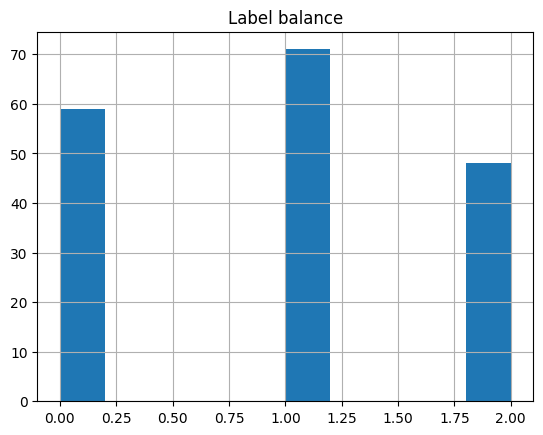

In [32]:
Y.hist()
plt.title('Label balance')
plt.show()

## KNN Method

In [33]:
obj_0 = X.iloc[0]
obj_1 = X.iloc[1]
obj_2 = X.iloc[170]

X.iloc[[0,1,170]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0


In [34]:
print(f'obj_0: {Y[0]} \nobj_1: {Y[1]} \nobj_2: {Y[170]}')

obj_0: 0 
obj_1: 0 
obj_2: 2


In [36]:
from sklearn.metrics import pairwise_distances

pairwise_distance = pairwise_distances([obj_0, obj_1, obj_2], metric='manhattan')
pairwise_distance

array([[  0.  ,  51.06, 601.27],
       [ 51.06,   0.  , 561.67],
       [601.27, 561.67,   0.  ]])

In [39]:
data = pd.concat([X,Y], axis=1)
classwise_distance = np.zeros((len(Y.unique()), len(Y.unique())))


for i in range(len(Y.unique())):
    for j in range(len(Y.unique())):
        class_i_data = data[data['target'] == i]
        class_j_data = data[data['target'] == j]
        classwise_distance[i,j] = (np.mean(pairwise_distances(class_i_data, class_j_data, metric='manhattan')) / 2.0)

classwise_distance

array([[133.46391841, 315.73112199, 259.8416949 ],
       [315.73112199,  98.640415  , 107.53131806],
       [259.8416949 , 107.53131806,  75.10512151]])

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=6, metric='chebyshev')
knn.fit(X, Y)

KNeighborsClassifier(metric='chebyshev', n_neighbors=6)

In [41]:
accuracy = accuracy_score(y_pred = knn.predict(X), y_true=Y)
print(f'Accuracy: {accuracy * 100:0.2f}%')

Accuracy: 77.53%


In [45]:
results = []

for distance_type in ['euclidean', 'manhattan', 'chebyshev']:
    for k in [1, 3, 5, 7]:
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance_type)
        knn.fit(X, Y)
        y_pred = knn.predict(X)
        accuracy = str(round(accuracy_score(Y, y_pred) * 100)) + '%'

        results.append(
            {
                'n_neighbours': 'k=' + str(k),
                'distance_type': distance_type,
                'accuracy': accuracy
            }
        )
result_df = pd.DataFrame(results)
result_df.pivot(index='distance_type', columns='n_neighbours', values='accuracy')

n_neighbours,k=1,k=3,k=5,k=7
distance_type,,,,
chebyshev,100%,84%,80%,74%
euclidean,100%,87%,79%,75%
manhattan,100%,90%,86%,85%


## Деление выборок 

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_tmp, y_train, y_tmp = train_test_split(X, Y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.5, random_state=42)

print(f'Train: {x_train.shape}, {y_train.shape}')
print(f'Test: {x_test.shape}, {y_test.shape}')
print(f'Val: {x_val.shape}, {y_val.shape}')
print(f'Total: {X.shape}, {Y.shape}')

Train: (142, 13), (142,)
Test: (18, 13), (18,)
Val: (18, 13), (18,)
Total: (178, 13), (178,)


In [55]:
knn = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn.fit(x_train, y_train)

accuracy_train = accuracy_score(y_pred=knn.predict(x_train), y_true=y_train)
accuracy_test = accuracy_score(y_pred=knn.predict(x_test), y_true=y_test)
accuracy_val = accuracy_score(y_pred=knn.predict(x_val), y_true=y_val)

print("Accuracy train:", f"{accuracy_train*100:.02f}%")
print("Accuracy val :", f"{accuracy_val*100:.02f}%")
print("Accuracy test :", f"{accuracy_test*100:.02f}%")

Accuracy train: 100.00%
Accuracy val : 66.67%
Accuracy test : 77.78%


In [59]:
def count_labels(labels):
    label_count = {}
    for item in labels:
        if item not in label_count:
            label_count[item] = 0
        label_count[item] +=1
    
    return label_count


def print_split_stat(x_train, x_val, y_train, y_val):
    print("Train statistics: ", count_labels(y_train))
    print("Val statistics:  ", count_labels(y_val))

In [60]:
from sklearn.datasets import load_iris

data, labels = load_iris(return_X_y=True)
print(f'Dataset labels {labels}')
print("DataSet statistics: ", count_labels(labels))

Dataset labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
DataSet statistics:  {np.int64(0): 50, np.int64(1): 50, np.int64(2): 50}


Отключаеме shuffle, ни одни объект класса 2 не попадет в трейновую выборку.

In [62]:
x_train, x_val, y_train, y_val = train_test_split(
    data, labels, train_size=0.5, shuffle=False, random_state=42)

print_split_stat(x_train, x_val, y_train, y_val)

Train statistics:  {np.int64(0): 50, np.int64(1): 25}
Val statistics:   {np.int64(1): 25, np.int64(2): 50}


In [63]:
x_train, x_val, y_train, y_val = train_test_split(
    data, labels, train_size=0.5, random_state=42)

print_split_stat(x_train, x_val, y_train, y_val)

Train statistics:  {np.int64(1): 27, np.int64(2): 27, np.int64(0): 21}
Val statistics:   {np.int64(1): 23, np.int64(0): 29, np.int64(2): 23}


Сохраним такую же стратификацию, как и в исходном датасете. 

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    data, labels, train_size=0.5, random_state=42, stratify=labels)

print_split_stat(x_train, x_val, y_train, y_val)

## Кросс-валидация

In [71]:
def split_and_train(x, y, random_state):
    x_train, x_val, y_train, y_val = train_test_split(
    x, y, train_size=0.8, random_state=random_state, stratify=y)

    num_neighbors = np.arange(1, 31)
    train_accuracy = np.zeros(30)
    val_accuracy = np.zeros(30)

    for k in num_neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)

        train_accuracy[k-1] = accuracy_score(y_pred=knn.predict(x_train), y_true=y_train)
        val_accuracy[k-1] = accuracy_score(y_pred=knn.predict(x_val), y_true=y_val)

    plt.figure(figsize=(10, 4))
    plt.title(f"k-NN on train vs val, seed = {random_state}", size=20)
    plt.plot(num_neighbors, train_accuracy, label="train")
    plt.plot(num_neighbors, val_accuracy, label="val")
    plt.legend()
    plt.xticks(num_neighbors, size=12)
    plt.xlabel("Neighbors", size=14)
    plt.ylabel("Accuracy", size=14)
    plt.show()


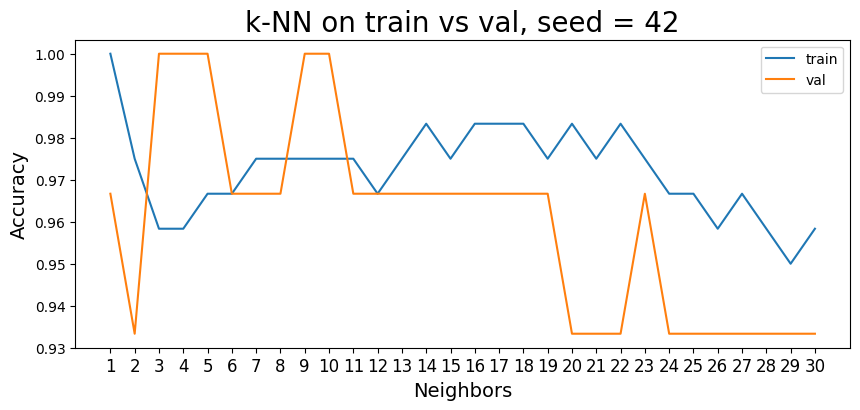

In [72]:
split_and_train(data, labels, random_state=42)

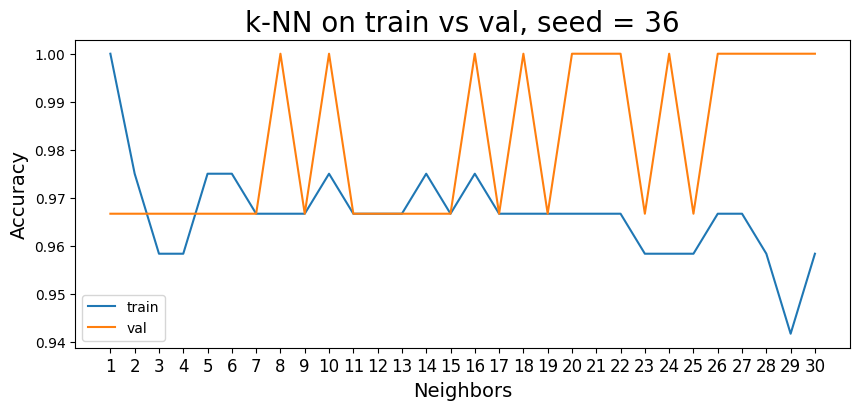

In [73]:
split_and_train(data, labels, random_state=36)

Многое зависит от того, повезло или нет. Если подбирать гиперпараметры на train set, то можно переобучиться на более высоком уровне. Кроме того, возможно, что выбор гиперпараметры будут зависить от того, как разбилась выборка на train  и val.

Тогда лучше провести несколько разбиений. Тренировочная выборка будет разделяться на k частей и постепенно каждая из этих частей будет становиться валидационной.

In [80]:
from sklearn.model_selection import KFold

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

print('index without shuffle')
kf = KFold(n_splits=3)
for train_index, val_index in kf.split(x):
    print('TRAIN:', train_index, 'VAL: ', val_index)

print('index with shuffle')
kf = KFold(n_splits=3, random_state=42, shuffle=True)
for train_index, val_index in kf.split(x):
    print('TRAIN:', train_index, 'VAL: ', val_index)

index without shuffle
TRAIN: [3 4 5 6 7 8] VAL:  [0 1 2]
TRAIN: [0 1 2 6 7 8] VAL:  [3 4 5]
TRAIN: [0 1 2 3 4 5] VAL:  [6 7 8]
index with shuffle
TRAIN: [0 2 3 4 6 8] VAL:  [1 5 7]
TRAIN: [1 3 4 5 6 7] VAL:  [0 2 8]
TRAIN: [0 1 2 5 7 8] VAL:  [3 4 6]


In [83]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=0.8, random_state=42, stratify=labels)

cv = StratifiedKFold(n_splits=5)

knn = KNeighborsClassifier(n_neighbors=3)
accuracy_3 = cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy')

knn = KNeighborsClassifier(n_neighbors=5)
accuracy_5 = cross_val_score(knn, x_train, y_train, cv=cv, scoring='accuracy')


In [86]:
knn_cv = np.vstack(
    (np.hstack((accuracy_3, accuracy_3.mean(), accuracy_3.std())), 
    np.hstack((accuracy_5, accuracy_5.mean(), accuracy_5.std()))
    )
)

In [89]:
table = pd.DataFrame(knn_cv, columns=["Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "Mean", "Std"])
table.insert(loc=0, column='k', value=[3,5])
table = table.set_axis(['Accuracy'] *2)
table

,k,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,Std
Accuracy,3,0.916667,0.958333,0.958333,0.958333,1.0,0.958333,0.026352
Accuracy,5,0.916667,1.000000,0.958333,1.000000,1.0,0.975000,0.033333
